## Import nesessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

## Read the Data from CSV file and assign it to a Dataframe

In [2]:
Df_Customer= pd.read_csv("Customers.csv")

In [3]:
Df_Customer.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [4]:
Df_Customer.shape

(2000, 8)

In [5]:
# Since ID coulumn doesnt have info remove column id

Df_Customer = Df_Customer.drop(columns=['CustomerID'])
Df_Customer.head()


,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,Male,19,15000,39,Healthcare,1,4
1,Male,21,35000,81,Engineer,3,3
2,Female,20,86000,6,Engineer,1,1
3,Female,23,59000,77,Lawyer,0,2
4,Female,31,38000,40,Entertainment,2,6


## The goal is to try to identify clusters of customers that have similar characteristics for the purpose of targeting different segments for different types of Profession and income

## Data investigation

###Check for Null values, Duplicates rows, datatypes,outliers, corelation and skewness

In [6]:
## finding null values
Df_Customer.isnull().sum()

Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [7]:
## check for duplicate rows
Df_Customer.duplicated().sum()

0

In [8]:
## check the datatypes
Df_Customer.dtypes

Gender                    object
Age                        int64
Annual Income ($)          int64
Spending Score (1-100)     int64
Profession                object
Work Experience            int64
Family Size                int64
dtype: object

In [9]:
Df_Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  2000 non-null   object
 1   Age                     2000 non-null   int64 
 2   Annual Income ($)       2000 non-null   int64 
 3   Spending Score (1-100)  2000 non-null   int64 
 4   Profession              1965 non-null   object
 5   Work Experience         2000 non-null   int64 
 6   Family Size             2000 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 109.5+ KB


In [10]:
Df_Customer_preprocessed= Df_Customer.copy()

### Dropping null vales of profession as the % is very low

In [11]:
Df_Customer_preprocessed = Df_Customer.dropna(subset=['Profession'])

In [12]:
# prompt: reset index

Df_Customer_preprocessed.reset_index(inplace=True, drop=True)


In [13]:
# prompt: lable encoding for proffsion coulmn in Df_Customer_preprocessed

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to the Profession column
Df_Customer_preprocessed['Profession'] = le.fit_transform(Df_Customer_preprocessed['Profession'])

# Print the encoded Profession column
Df_Customer_preprocessed['Profession'].head()


<ipython-input-13-4acf509dd47a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df_Customer_preprocessed['Profession'] = le.fit_transform(Df_Customer_preprocessed['Profession'])


0    5
1    2
2    2
3    7
4    3
Name: Profession, dtype: int64

In [14]:
# prompt: one hot encoding with values 0 and 1 for gender coulmn in Df_Customer_preprocessed

Df_Customer_preprocessed = pd.get_dummies(Df_Customer_preprocessed, columns=['Gender'], dtype=int)
Df_Customer_preprocessed.head()


,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Gender_Female,Gender_Male
0,19,15000,39,5,1,4,0,1
1,21,35000,81,2,3,3,0,1
2,20,86000,6,2,1,1,1,0
3,23,59000,77,7,0,2,1,0
4,31,38000,40,3,2,6,1,0


In [15]:
Df_Customer_preprocessed.drop(columns=['Gender_Female'],inplace=True)

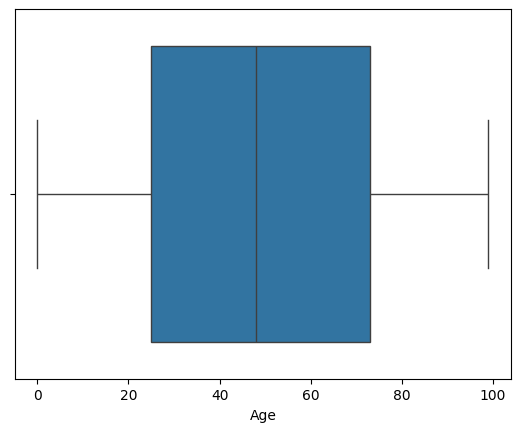

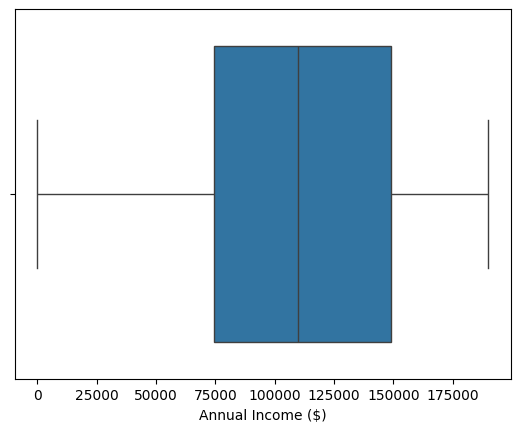

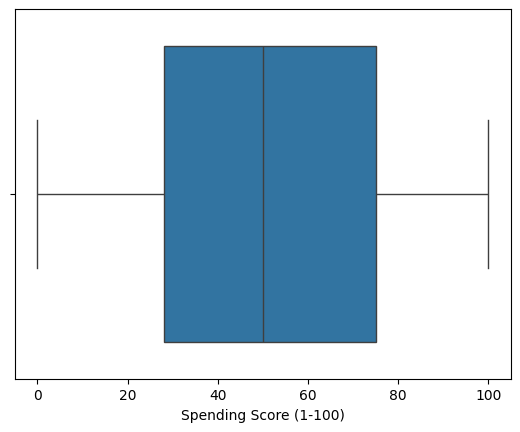

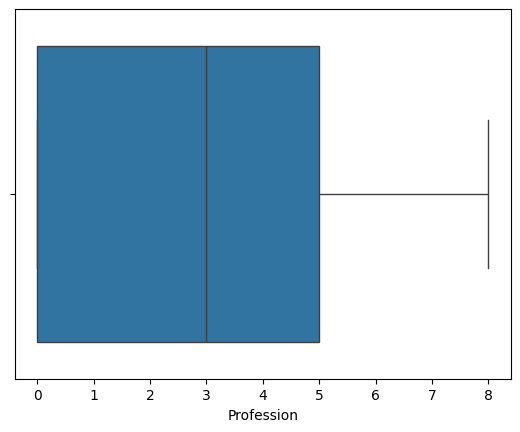

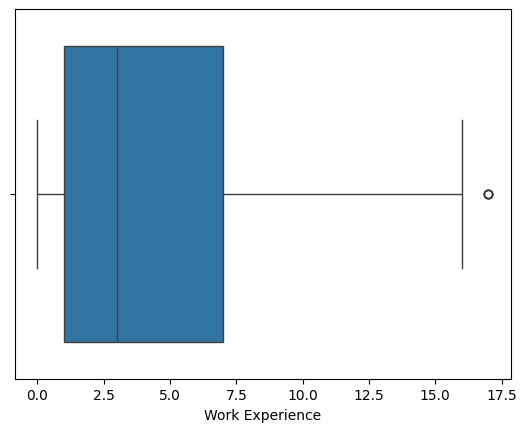

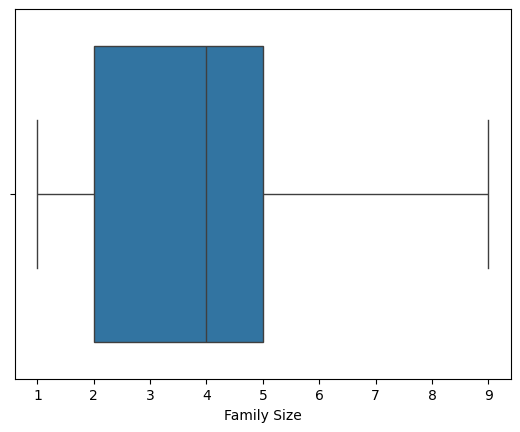

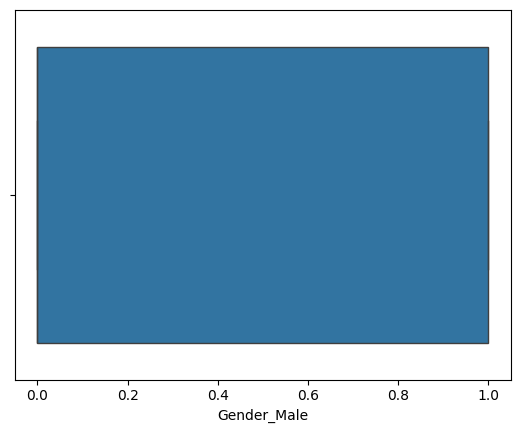

In [16]:
# box plot of each column for checking outliers

import seaborn as sns

for col in Df_Customer_preprocessed.columns:
    sns.boxplot(x=Df_Customer_preprocessed[col])
    plt.show()


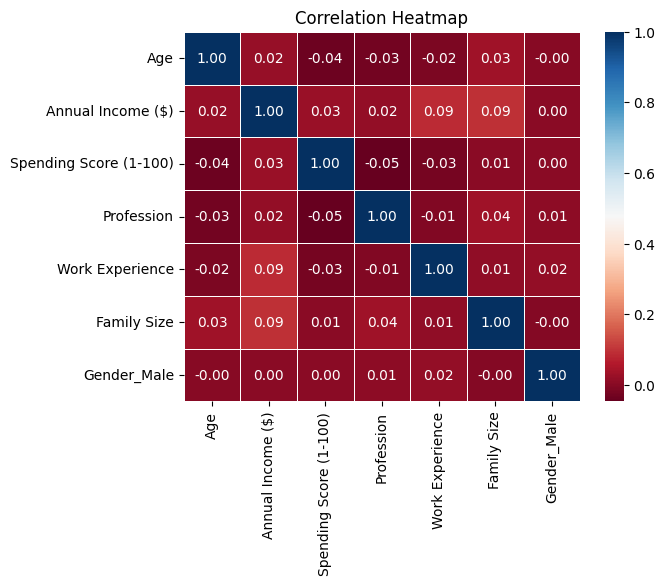

In [17]:
# prompt: Corellation heatmap among the coulmns

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = Df_Customer_preprocessed.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True,cmap='RdBu', fmt=".2f", linewidths=0.5)

# Set the plot title
plt.title("Correlation Heatmap")

# Display the plot
plt.show()


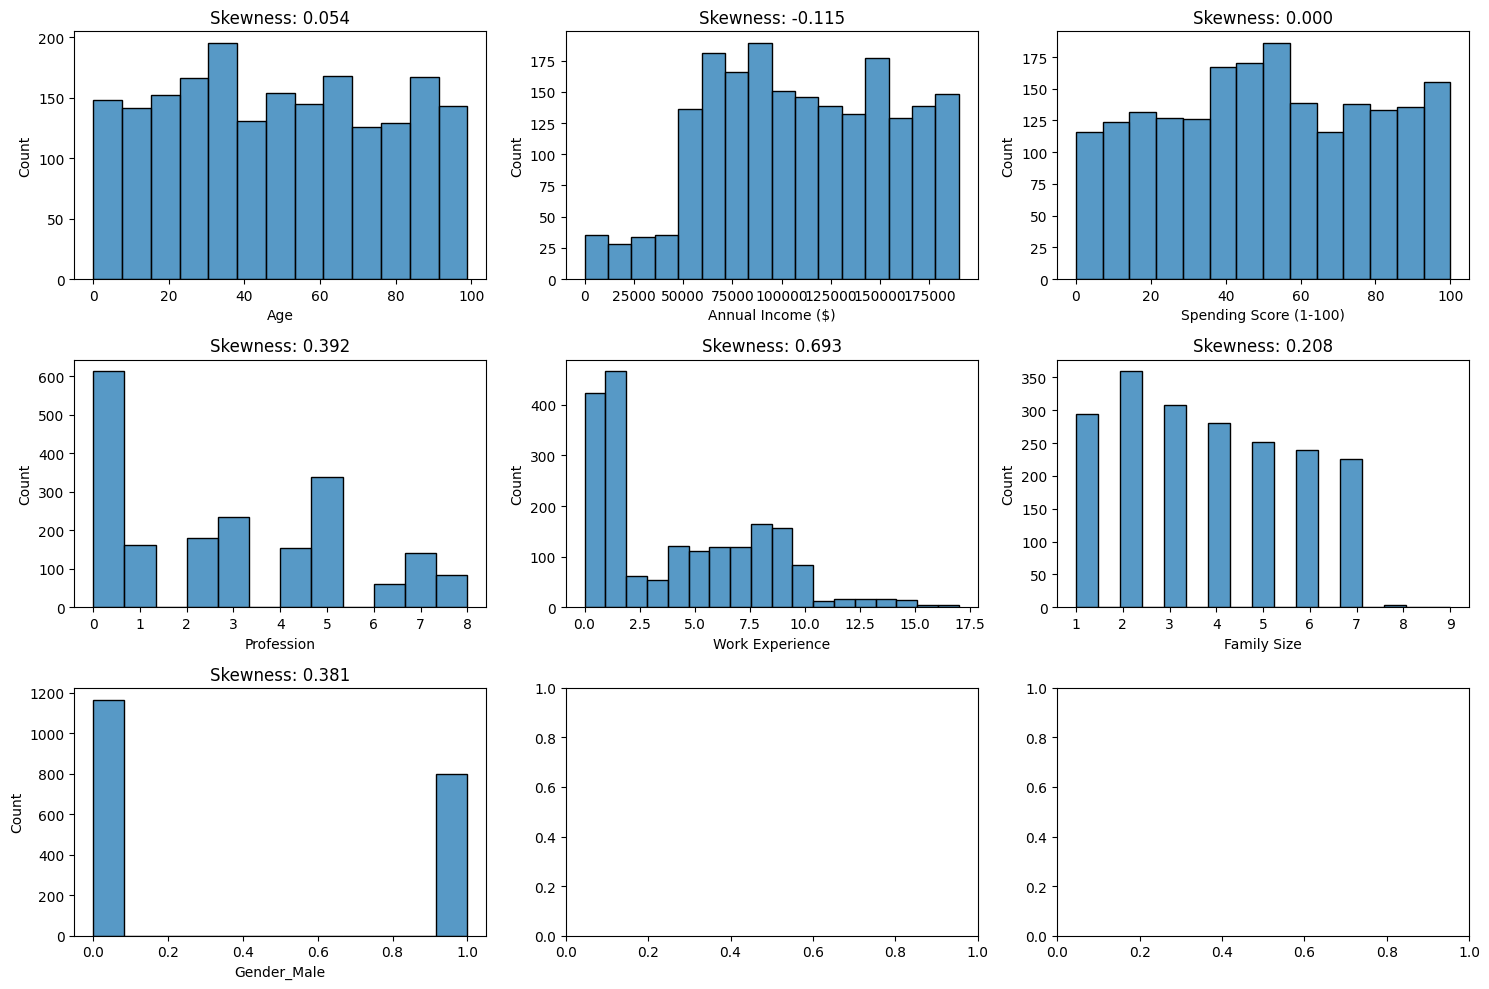

In [18]:
# Select the desired columns
cols = Df_Customer_preprocessed.iloc[:, 0:]

# Create the subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# Plot the histograms with skewness values
for i, col in enumerate(cols):
    sns.histplot(Df_Customer_preprocessed[col], ax=axes[i //3 , i % 3], kde=False)
    skewness = Df_Customer_preprocessed[col].skew()
    axes[i // 3, i % 3].set_title(f"Skewness: {skewness:.3f}")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [19]:
Df_Customer_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1965 entries, 0 to 1964
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     1965 non-null   int64
 1   Annual Income ($)       1965 non-null   int64
 2   Spending Score (1-100)  1965 non-null   int64
 3   Profession              1965 non-null   int64
 4   Work Experience         1965 non-null   int64
 5   Family Size             1965 non-null   int64
 6   Gender_Male             1965 non-null   int64
dtypes: int64(7)
memory usage: 107.6 KB


### from the Data what I had found in the previous part
  1-No correlation between some columns

  2- Different scales

  3- Skwewness in very less

  4- very negligible amount of out liers





## Data Preprocessing

## Finding suitable number of clusters

In [20]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(Df_Customer_preprocessed)
    wcss.append(kmeans.inertia_)
    if i > 2:
      break

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

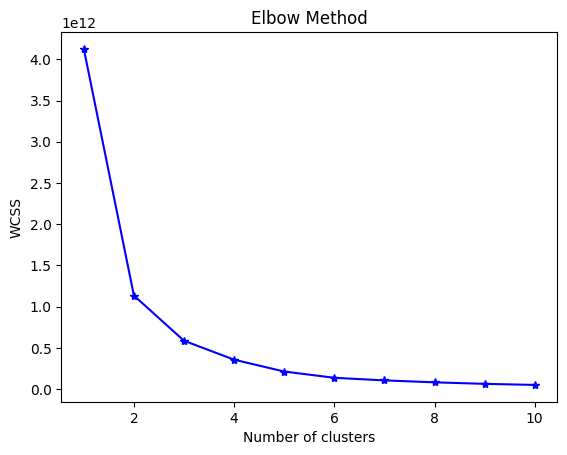

In [21]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(Df_Customer_preprocessed)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, 'b*-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Plotting TSNE with Data with out standerdization

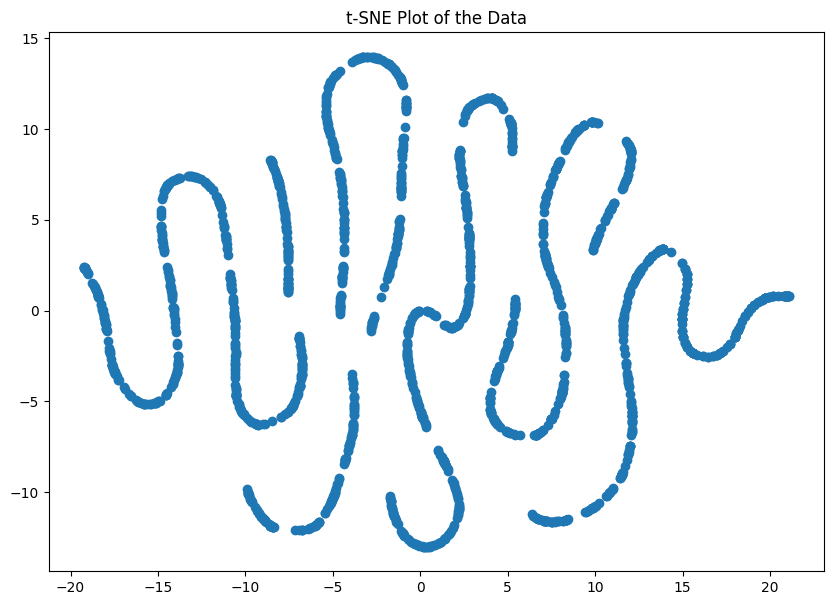

In [22]:
# prompt: T SNE plot for the data

from sklearn.manifold import TSNE

# Initialize and fit the TSNE model
#tsne_model = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3)
tsne_model=TSNE(n_components=2,  perplexity=30, learning_rate=0.1, n_iter=2000)
transformed_data = tsne_model.fit_transform(Df_Customer_preprocessed)

# Create a scatter plot of the transformed data
plt.figure(figsize=(10, 7))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.title('t-SNE Plot of the Data')
plt.show()


## standardization of Data

In [23]:
 #prompt: standerdize Df_Customer_preprocessed_wo_outliers

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_data = scaler.fit_transform(Df_Customer_preprocessed)

Df_standardized_data = pd.DataFrame(standardized_data, columns=Df_Customer_preprocessed.columns)


## Appling TSNE with standardization of Data

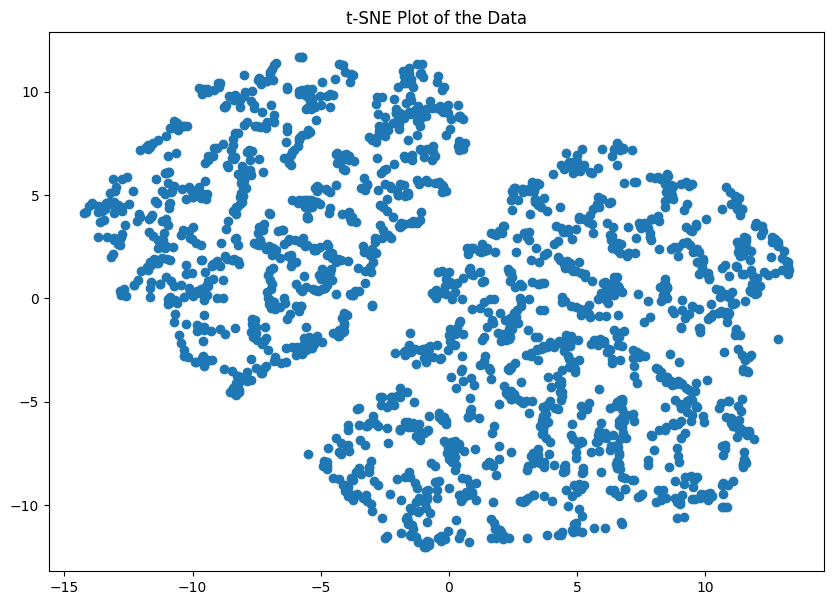

In [24]:
# Apply t-SNE to reduce dimensions to 2 for visualization

from sklearn.manifold import TSNE

# Initialize and fit the TSNE model
#tsne_model = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3)
tsne_model=TSNE(n_components=2,  perplexity=30, learning_rate=0.1, n_iter=2000)
transformed_data = tsne_model.fit_transform(Df_standardized_data)

# Create a scatter plot of the transformed data
plt.figure(figsize=(10, 7))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.title('t-SNE Plot of the Data')
plt.show()

In [25]:
Df_transformed_data = pd.DataFrame(data=transformed_data, columns=['t-SNE Component 1', 't-SNE Component 2'])

## Apply K means Alogorithem

In [26]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(Df_standardized_data)
centroids = clusters_new.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [27]:
clusters_new.labels_

array([0, 0, 2, ..., 0, 0, 0], dtype=int32)

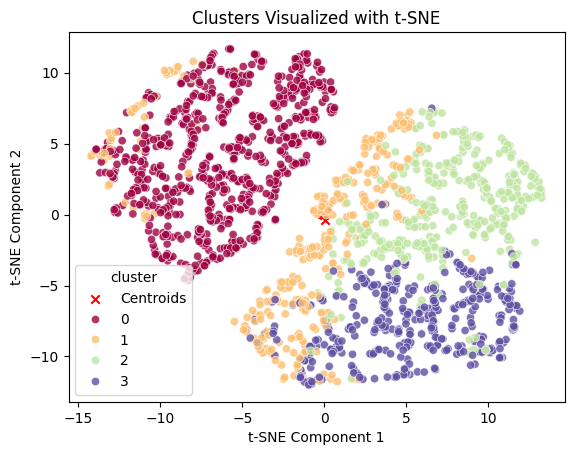

In [28]:
# Add the cluster information to the reduced data
Df_transformed_data['cluster'] = clusters_new.labels_

# Plotting
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', label='Centroids')
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='cluster', data=Df_transformed_data, palette='Spectral', alpha=0.8 )
plt.title('Clusters Visualized with t-SNE')
plt.show()

### The above visualization is done on 2d interpation of actual data, not on the original data so this should be considerd for reference purpose only

In [29]:
Df_Customer_preprocessed_cluster = Df_Customer_preprocessed.copy()
Df_Customer_preprocessed_cluster['cluster'] = clusters_new.labels_
Df_Customer_preprocessed_cluster.head()


,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Gender_Male,cluster
0,19,15000,39,5,1,4,1,0
1,21,35000,81,2,3,3,1,0
2,20,86000,6,2,1,1,0,2
3,23,59000,77,7,0,2,0,3
4,31,38000,40,3,2,6,0,2
